# **Financial Lab**
## **Juan Diego Tabares**

In this lab we are going to analyze a group of time series and perform a financial analysis using graphical and statistical concepts and tools in order to develop a trading strategy.

The analysis involves:

- Downloading the historical price of different financial assets
- Performing a graphical analysis 
- Performing bivarite analysis
- Checking for time series stationarity
- Comparing different strategies results

In [1]:
# Importing libraries

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import yfinance as yf
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from statsmodels.tsa.stattools import adfuller
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

Data

The data used corresponds to the period January 1, 2022, to December 31, 2022, for five financials assets, representing:

- Three blue chips stocks. Two related to the technology sector (Apple and Nvidia), and one from the food sector (Coca-Cola).
- One alternative investment (Bitcoin).
- One defensive asset (gold).

In [2]:
data_appl = yf.download('AAPL','2022-01-01','2023-01-01')
data_nvda = yf.download('NVDA','2022-01-01','2023-01-01')
data_ko = yf.download('KO','2022-01-01','2023-01-01') 
data_btc = yf.download('BTC-USD','2022-01-01','2023-01-01')
data_gold = yf.download('GC=F','2022-01-01','2023-01-01')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
dict = {'Apple': data_appl['Adj Close'], 'Nvidia': data_nvda['Adj Close'], 'Coca-Cola': data_ko['Adj Close'], 'BTC': data_btc['Adj Close'], 
       'Gold': data_gold['Adj Close']}

df = pd.DataFrame(dict)
df

,Apple,Nvidia,Coca-Cola,BTC,Gold
Date,,,,,
2022-01-01,NaN,NaN,NaN,47686.812500,NaN
2022-01-02,NaN,NaN,NaN,47345.218750,NaN
2022-01-03,180.434280,300.877472,57.157574,46458.117188,1799.400024
2022-01-04,178.144272,292.576691,58.111813,45897.574219,1814.000000
2022-01-05,173.405685,275.735291,58.593742,43569.003906,1824.599976
...,...,...,...,...,...
2022-12-27,129.652435,141.186020,63.721226,16717.173828,1814.800049
2022-12-28,125.674019,140.336166,63.086098,16552.572266,1807.900024
2022-12-29,129.233658,146.005203,63.463207,16642.341797,1819.500000


In [4]:
#data_prices = 'data_prices.xlsx'
#df.to_excel(data_prices)

In order to analyze a correct diversification of our portfolio, we review the correlation between the respective prices.

In this sense, we observe high correlations between Apple and Nvidia (0.759930), while weaker correlations such as Coca-cola and Nvidia (0.051988), or even negative correlations between Coca-Cola and Bitcoin (-0.063535).

In [5]:
corr = df.corr(method = 'pearson')
corr

,Apple,Nvidia,Coca-Cola,BTC,Gold
Apple,1.000000,0.759930,0.051988,0.718637,0.379799
Nvidia,0.759930,1.000000,0.051157,0.902795,0.732244
Coca-Cola,0.051988,0.051157,1.000000,-0.063535,0.277044
BTC,0.718637,0.902795,-0.063535,1.000000,0.759588
Gold,0.379799,0.732244,0.277044,0.759588,1.000000


For the asset allocation within our portfolio, we use the data from the previous semester (June 1, 2021, to December 31, 2021). We analyze the previous returns and allocate the budget with this guidance.

In [6]:
data_appl_2021 = yf.download('AAPL','2021-06-01','2022-01-01')
data_nvda_2021 = yf.download('NVDA','2021-06-01','2022-01-01')
data_ko_2021 = yf.download('KO','2021-06-01','2022-01-01') 
data_btc_2021 = yf.download('BTC-USD','2021-06-01','2022-01-01')
data_gold_2021 = yf.download('GC=F','2021-06-01','2022-01-01')

data_appl_2021 = data_appl_2021['Adj Close']
data_nvda_2021 = data_nvda_2021['Adj Close']
data_ko_2021 = data_ko_2021['Adj Close']
data_btc_2021 = data_btc_2021['Adj Close']
data_gold_2021 = data_gold_2021['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
dict = {'Apple': data_appl_2021, 'Nvidia': data_nvda_2021, 'Coca-Cola': data_ko_2021, 'BTC': data_btc_2021, 
       'Gold': data_gold_2021}

df_S12021 = pd.DataFrame(dict)
df_S12021['date'] = pd.date_range(start='6/1/2021', periods=len(df_S12021), freq='D')
df_S12021

,Apple,Nvidia,Coca-Cola,BTC,Gold,date
Date,,,,,,
2021-06-01,122.840477,162.379715,52.084286,36684.925781,1902.900024,2021-06-01
2021-06-02,123.611450,167.508835,52.291569,37575.179688,1907.500000,2021-06-02
2021-06-03,122.109062,169.420700,52.423477,39208.765625,1871.199951,2021-06-03
2021-06-04,124.431831,175.495789,52.988792,36894.406250,1889.800049,2021-06-04
2021-06-05,NaN,NaN,NaN,35551.957031,NaN,2021-06-05
...,...,...,...,...,...,...
2021-12-27,178.768860,309.108429,56.531063,50640.417969,1808.099976,2021-12-27
2021-12-28,177.737823,302.885284,56.752750,47588.855469,1810.199951,2021-12-28
2021-12-29,177.827072,299.678833,56.820221,46444.710938,1805.099976,2021-12-29


In [8]:
return_S22021 = df_S12021.diff(periods=213)
return_S22021 = return_S22021.loc[return_S22021['date'] == '213 days']

Apple_f2021 = df_S12021.loc[df_S12021['date'] == '2021-12-31', 'Apple']
Nvidia_f2021 = df_S12021.loc[df_S12021['date'] == '2021-12-31', 'Nvidia']
Coca_Cola_f2021 = df_S12021.loc[df_S12021['date'] == '2021-12-31', 'Coca-Cola']
BTC_f2021 = df_S12021.loc[df_S12021['date'] == '2021-12-31', 'BTC']
Gold_f2021 = df_S12021.loc[df_S12021['date'] == '2021-12-31', 'Gold']

Apple_f2021 = np.asscalar(Apple_f2021)
Nvidia_f2021 = np.asscalar(Nvidia_f2021)
Coca_Cola_f2021 = np.asscalar(Coca_Cola_f2021)
BTC_f2021 = np.asscalar(BTC_f2021)
Gold_f2021 = np.asscalar(Gold_f2021)

Apple_i2021 = df_S12021.loc[df_S12021['date'] == '2021-06-01', 'Apple']
Nvidia_i2021 = df_S12021.loc[df_S12021['date'] == '2021-06-01', 'Nvidia']
Coca_Cola_i2021 = df_S12021.loc[df_S12021['date'] == '2021-06-01', 'Coca-Cola']
BTC_i2021 = df_S12021.loc[df_S12021['date'] == '2021-06-01', 'BTC']
Gold_i2021 = df_S12021.loc[df_S12021['date'] == '2021-06-01', 'Gold']

Apple_i2021 = np.asscalar(Apple_i2021)
Nvidia_i2021 = np.asscalar(Nvidia_i2021)
Coca_Cola_i2021 = np.asscalar(Coca_Cola_i2021)
BTC_i2021 = np.asscalar(BTC_i2021)
Gold_i2021 = np.asscalar(Gold_i2021)

return_S22021.loc[len(return_S22021.index)] = [(Apple_f2021/Apple_i2021)-1, (Nvidia_f2021/Nvidia_i2021)-1,
                                               (Coca_Cola_f2021/Coca_Cola_i2021)-1, (BTC_f2021/BTC_i2021)-1,
                                               (Gold_f2021/Gold_i2021)-1, ' ']

return_S22021.loc[len(return_S22021.index)] = [25, 45, 10, 15, 5, ' ']
return_S22021.loc[len(return_S22021.index)] = [10000*0.25, 10000*0.45, 10000*0.10, 10000*0.15, 10000*0.05, ' ']

return_S22021                                       

,Apple,Nvidia,Coca-Cola,BTC,Gold,date
Date,,,,,,
2021-12-31 00:00:00,53.192268,131.405624,4.986542,9621.519531,-75.400024,213 days 00:00:00
1,0.433019,0.809249,0.095740,0.262274,-0.039624,
2,25.000000,45.000000,10.000000,15.000000,5.000000,
3,2500.000000,4500.000000,1000.000000,1500.000000,500.000000,


As Nvidia had the highest return, we allocate 45% of the budget in this stock. Consequently, Apple receives 25%, Bitcoin 15%, Coca-Cola 10%, and gold 5%.

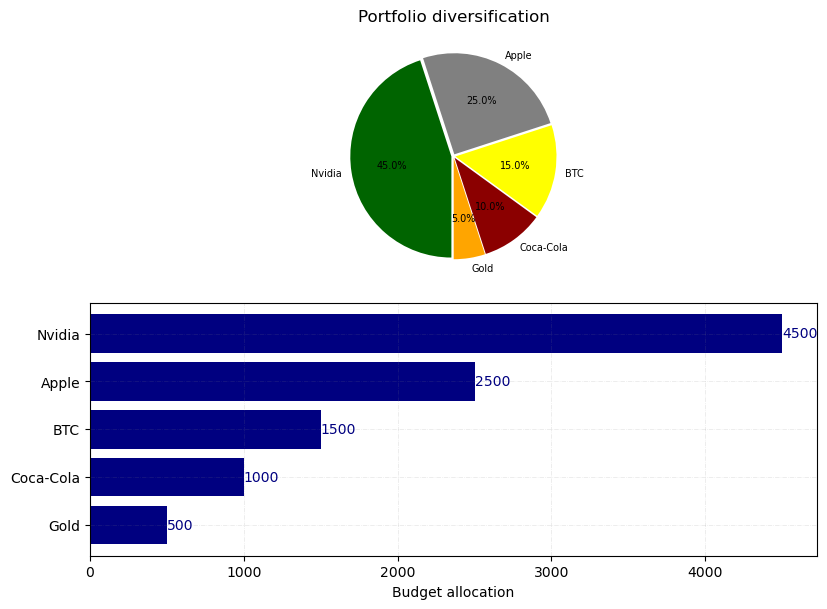

In [9]:
Proportion = [25, 45, 10, 15, 5]
labels = ['Apple', 'Nvidia', 'Coca-Cola', 'BTC', 'Gold']
Budget = [2500, 4500, 1000, 1500, 500]
dict = {'Proportion': Proportion, 'Labels': labels, 'Budget': Budget}
df_p = pd.DataFrame(dict)
df_p_sort = df_p.sort_values('Proportion')

fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

ax1.pie(df_p_sort['Proportion'], labels=df_p_sort['Labels'], autopct='%1.1f%%', colors = ( "orange", "darkred", "yellow", 
          "gray", 'darkgreen'), explode = (0.02, 0.02, 0.02, 0.02, 0.02), startangle = 270, textprops={'fontsize': 7})
ax1.set_title('Portfolio diversification')
plt.tight_layout()

ax2.barh('Labels', 'Budget', data=df_p_sort, color = 'navy')
ax2.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
plt.xlabel('Budget allocation')
for bars in ax2.containers:
    ax2.bar_label(bars, color = 'navy')

In what follows, we are going to test the profitability of a trading strategy, namely a mean reverting strategy.  

With this purpose, firstly, we analyze graphically the possible assets' mean-reverting behavior, then we contrast this with an augmented Dickey-Fuller test. For simplicity, we are going to focus on the Apple stock. 

- Graphically: the Apple stock looks to fluctuate around its mean
- Statistically: the time series is non-stationary. Does not have constant variance over time.


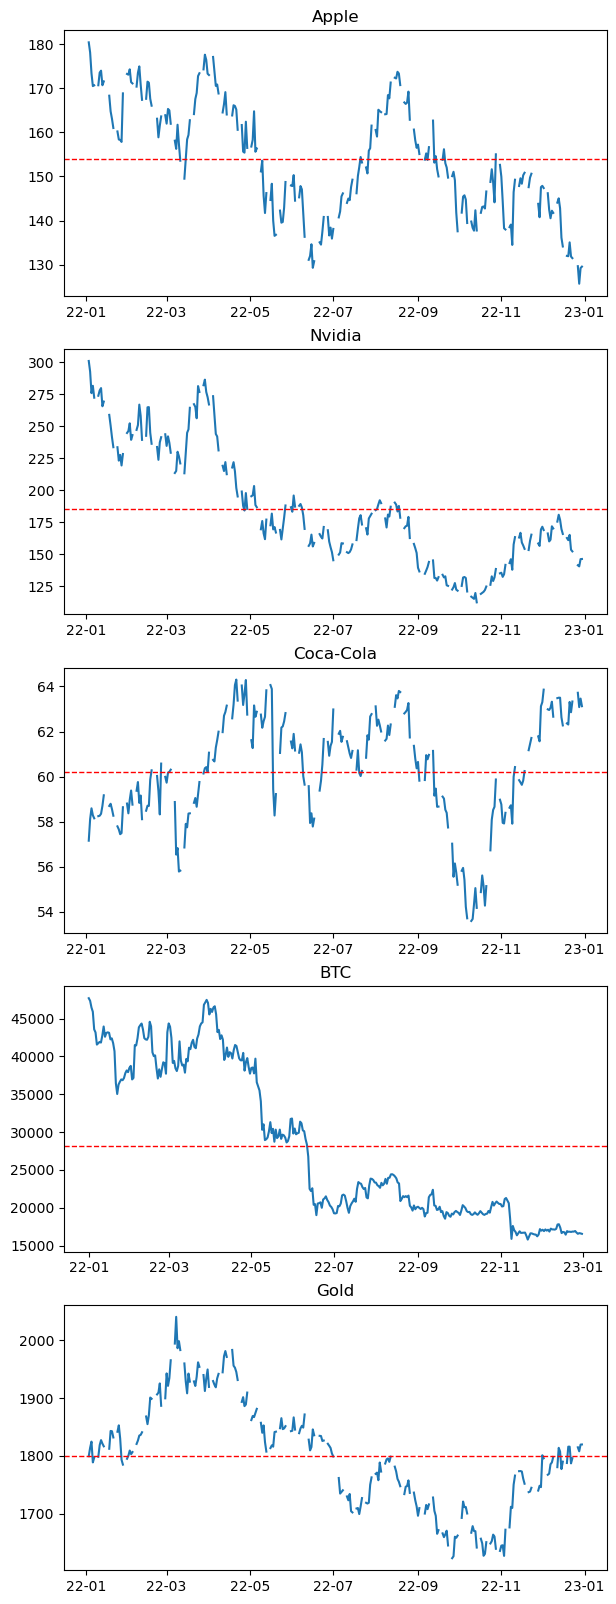

In [10]:
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, figsize=(7, 20))
ax1.plot(df['Apple'])
ax1.set_title('Apple')
ax1.axhline(y=np.nanmean(df['Apple']), color='red', linestyle='--', linewidth=1, label='Avg')
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

ax2.plot(df['Nvidia'])
ax2.set_title('Nvidia')
ax2.axhline(y=np.nanmean(df['Nvidia']), color='red', linestyle='--', linewidth=1, label='Avg')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

ax3.plot(df['Coca-Cola'])
ax3.set_title('Coca-Cola')
ax3.axhline(y=np.nanmean(df['Coca-Cola']), color='red', linestyle='--', linewidth=1, label='Avg')
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

ax4.plot(df['BTC'])
ax4.set_title('BTC')
ax4.axhline(y=np.nanmean(df['BTC']), color='red', linestyle='--', linewidth=1, label='Avg')
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))

ax5.plot(df['Gold'])
ax5.set_title('Gold')
ax5.axhline(y=np.nanmean(df['Gold']), color='red', linestyle='--', linewidth=1, label='Avg')
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%y'))
ax5.xaxis.set_major_formatter(mdates.DateFormatter('%y-%m'))


In [11]:
Apple_urt = df['Apple'][~np.isnan(df['Apple'])]
Apple_urt_2021 = data_appl_2021[~np.isnan(data_appl_2021)]

In [12]:
adfuller(Apple_urt)
## test does not reject H0, time series is non-stationary

(-2.19612232771751,
 0.2076558373347015,
 0,
 250,
 {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544},
 1244.1298860535742)

In [13]:
adfuller(Apple_urt_2021)
## test does not reject H0, time series is non-stationary

(-0.7147516495082992,
 0.8428914374906781,
 0,
 149,
 {'1%': -3.4750180242954167,
  '5%': -2.8811408028842043,
  '10%': -2.577221358046935},
 590.9284125013907)

Taking into account some additional changes we can perform on the ADF test, and the graphical indication referring to a possible mean-reverting behavior, we continue applying the mean-reverting strategy. The strategy consists in buying the stock when it is below the mean during the last semester (June 1, 2021, to December 31, 2021), and selling it when it is above. The strategy is conducted on a quarterly basis, so the buying and selling activities are done one each quarter. 

In [14]:
def calc_mean(value):
    return value.mean()

mean_c = df.iloc[:,0:5].apply(calc_mean)

In [15]:
def calc_max(value_1):
    return value_1.max()

max_c = df.iloc[:,0:5].apply(calc_max)

In [16]:
def calc_min(value_2):
    return value_2.min()

min_c = df.iloc[:,0:5].apply(calc_min)

In [17]:
Asset = ['Apple', 'Nvidia', 'Coca-Cola', 'BTC', 'Gold']
dict = {'Asset': Asset, 'Mean': mean_c, 'Max': max_c, 'Min' : min_c}

df_des = pd.DataFrame(dict)
df_des

,Asset,Mean,Max,Min
Apple,Apple,153.933643,180.434280,125.674019
Nvidia,Nvidia,185.545220,300.877472,112.222221
Coca-Cola,Coca-Cola,60.225612,64.306442,53.595863
BTC,BTC,28197.754099,47686.812500,15787.284180
Gold,Gold,1800.068127,2040.099976,1623.300049


In [18]:
mean_c_2021 = data_appl_2021.mean()
mean_c_2021

147.79466939290364

In [19]:
def signal(value):
    if value < data_appl_2021.mean():
        return 'Buy'
    elif value > data_appl_2021.mean():
        return 'Sell'
    else:
        return ' '

In [20]:
df['Buy_Apple'] = df['Apple'].map(signal)
df

,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple
Date,,,,,,
2022-01-01,NaN,NaN,NaN,47686.812500,NaN,
2022-01-02,NaN,NaN,NaN,47345.218750,NaN,
2022-01-03,180.434280,300.877472,57.157574,46458.117188,1799.400024,Sell
2022-01-04,178.144272,292.576691,58.111813,45897.574219,1814.000000,Sell
2022-01-05,173.405685,275.735291,58.593742,43569.003906,1824.599976,Sell
...,...,...,...,...,...,...
2022-12-27,129.652435,141.186020,63.721226,16717.173828,1814.800049,Buy
2022-12-28,125.674019,140.336166,63.086098,16552.572266,1807.900024,Buy
2022-12-29,129.233658,146.005203,63.463207,16642.341797,1819.500000,Buy


In [21]:
display(df['Buy_Apple'][df['Buy_Apple'] == 'Buy'].count())
display(df['Buy_Apple'][df['Buy_Apple'] == 'Sell'].count())
display(df['Buy_Apple'][df['Buy_Apple'] == ' '].count())

89

162

114

In [22]:
df['date'] = pd.date_range(start='1/1/2022', periods=len(df), freq='D')
df

,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple,date
Date,,,,,,,
2022-01-01,NaN,NaN,NaN,47686.812500,NaN,,2022-01-01
2022-01-02,NaN,NaN,NaN,47345.218750,NaN,,2022-01-02
2022-01-03,180.434280,300.877472,57.157574,46458.117188,1799.400024,Sell,2022-01-03
2022-01-04,178.144272,292.576691,58.111813,45897.574219,1814.000000,Sell,2022-01-04
2022-01-05,173.405685,275.735291,58.593742,43569.003906,1824.599976,Sell,2022-01-05
...,...,...,...,...,...,...,...
2022-12-27,129.652435,141.186020,63.721226,16717.173828,1814.800049,Buy,2022-12-27
2022-12-28,125.674019,140.336166,63.086098,16552.572266,1807.900024,Buy,2022-12-28
2022-12-29,129.233658,146.005203,63.463207,16642.341797,1819.500000,Buy,2022-12-29


In [23]:
df['Month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year

In [24]:
Buy_Q1_2022 = df.loc[(df['Buy_Apple'] == 'Buy') & (df['Month'] >=1) & (df['Month'] <=3) & (df['Year'] == 2022)]
Buy_Q2_2022 = df.loc[(df['Buy_Apple'] == 'Buy') & (df['Month'] >=4) & (df['Month'] <=6) & (df['Year'] == 2022)]
Buy_Q3_2022 = df.loc[(df['Buy_Apple'] == 'Buy') & (df['Month'] >=7) & (df['Month'] <=9) & (df['Year'] == 2022)]
Buy_Q4_2022 = df.loc[(df['Buy_Apple'] == 'Buy') & (df['Month'] >=10) & (df['Month'] <=12) & (df['Year'] == 2022)]

display(Buy_Q1_2022.head(1)) ##2022-05-11
display(Buy_Q2_2022.head(1)) ##2022-05-11
display(Buy_Q3_2022.head(1)) ##2022-07-01
display(Buy_Q4_2022.head(1)) ##2022-10-03

,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple,date,Month,Year
Date,,,,,,,,,


,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple,date,Month,Year
Date,,,,,,,,,
2022-05-11,145.630417,166.14473,62.461063,28936.355469,1852.599976,Buy,2022-05-11,5,2022


,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple,date,Month,Year
Date,,,,,,,,,
2022-07-01,138.105347,145.125076,62.980824,19269.367188,1798.900024,Buy,2022-07-01,7,2022


,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple,date,Month,Year
Date,,,,,,,,,
2022-10-03,141.801147,125.066765,55.822872,19623.580078,1692.900024,Buy,2022-10-03,10,2022


In [25]:
Sell_Q1_2022 = df.loc[(df['Buy_Apple'] == 'Sell') & (df['Month'] >=1) & (df['Month'] <=3) & (df['Year'] == 2022) & (df['date'] > '2022-05-12')]
Sell_Q2_2022 = df.loc[(df['Buy_Apple'] == 'Sell') & (df['Month'] >=4) & (df['Month'] <=6) & (df['Year'] == 2022) & (df['date'] > '2022-05-12')]
Sell_Q3_2022 = df.loc[(df['Buy_Apple'] == 'Sell') & (df['Month'] >=7) & (df['Month'] <=9) & (df['Year'] == 2022) & (df['date'] > '2022-07-02')]
Sell_Q4_2022 = df.loc[(df['Buy_Apple'] == 'Sell') & (df['Month'] >=10) & (df['Month'] <=12) & (df['Year'] == 2022) & (df['date'] > '2022-10-04')]

display(Sell_Q1_2022.head(1)) ##2022-05-11 2022-05-17
display(Sell_Q2_2022.head(1)) ##2022-05-11 2022-05-17
display(Sell_Q3_2022.head(1)) ##2022-07-01 2022-07-15
display(Sell_Q4_2022.head(1)) ##2022-10-03 2022-10-24

,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple,date,Month,Year
Date,,,,,,,,,


,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple,date,Month,Year
Date,,,,,,,,,
2022-05-17,148.354141,181.600296,63.888802,30425.857422,1818.199951,Sell,2022-05-17,5,2022


,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple,date,Month,Year
Date,,,,,,,,,
2022-07-15,149.27861,157.506119,61.141682,20836.328125,1702.400024,Sell,2022-07-15,7,2022


,Apple,Nvidia,Coca-Cola,BTC,Gold,Buy_Apple,date,Month,Year
Date,,,,,,,,,
2022-10-24,148.769257,125.936378,56.729435,19345.572266,1648.699951,Sell,2022-10-24,10,2022


In [26]:
Q1_B_2022 = df.loc[df['date'] == '2022-05-11', 'Apple']
Q2_B_2022 = df.loc[df['date'] == '2022-05-11', 'Apple']
Q3_B_2022 = df.loc[df['date'] == '2022-07-01', 'Apple']
Q4_B_2022 = df.loc[df['date'] == '2022-10-03', 'Apple']

Q1_S_2022 = df.loc[df['date'] == '2022-05-17', 'Apple']
Q2_S_2022 = df.loc[df['date'] == '2022-05-17', 'Apple']
Q3_S_2022 = df.loc[df['date'] == '2022-07-15', 'Apple']
Q4_S_2022 = df.loc[df['date'] == '2022-10-24', 'Apple']


Q1_B_2022 = np.asscalar(Q1_B_2022)
Q2_B_2022 = np.asscalar(Q2_B_2022)
Q3_B_2022 = np.asscalar(Q3_B_2022)
Q4_B_2022 = np.asscalar(Q4_B_2022)

Q1_S_2022 = np.asscalar(Q1_S_2022)
Q2_S_2022 = np.asscalar(Q2_S_2022)
Q3_S_2022 = np.asscalar(Q3_S_2022)
Q4_S_2022 = np.asscalar(Q4_S_2022)

We get the results from the strategy with an accumulated profit of 23.6. As the value for hte initial purchase of the Apple stock on May 11, 2022, is 145.630417, our profit rate is equal to 16.2%. 

If we invest in the strategy the budget allocated (25% - 2500 USD), the accumulated profit ascends up to 406 USD.


Finally, we contrast the mean reverting strategy with a holding strategy and a quarterly holding strategy. Both antagonist strategies produce losses. In the first case, holding the stock the whole year, from January 1, 2022, to December 30, 2022, the accumulated loss is 50.9 USD. In the second case, the accumulated loss due to holding each quarter the stock is 57 USD.

In [27]:
ReturnQ1_meanS = Q1_S_2022 - Q1_B_2022
ReturnQ2_meanS = Q2_S_2022 - Q2_B_2022
ReturnQ3_meanS = Q3_S_2022 - Q3_B_2022
ReturnQ4_meanS = Q4_S_2022 - Q4_B_2022

print('Mean reverting strategy')
print('Return Q1', '=', ReturnQ1_meanS, sep = ' ')
print('Return Q2', '=', ReturnQ2_meanS, sep = ' ')
print('Return Q3', '=', ReturnQ3_meanS, sep = ' ')
print('Return Q4', '=', ReturnQ4_meanS, sep = ' ')
print('Accumulated return', '=', (ReturnQ1_meanS + ReturnQ2_meanS + ReturnQ3_meanS + ReturnQ4_meanS), sep = ' ')

Mean reverting strategy
Return Q1 = 2.723724365234375
Return Q2 = 2.723724365234375
Return Q3 = 11.173263549804688
Return Q4 = 6.968109130859375
Accumulated return = 23.588821411132812


In [28]:
H_B_2022 = df.loc[df['date'] == '2022-01-03', 'Apple']
H_S_2022 = df.loc[df['date'] == '2022-12-30', 'Apple']

H_B_2022 = np.asscalar(H_B_2022)
H_S_2022 = np.asscalar(H_S_2022)

In [29]:
Return_holdS = H_S_2022 - H_B_2022
print('Holding strategy')
print('Return', '=', Return_holdS, sep = ' ')

Holding strategy
Return = -50.881561279296875


In [30]:
Q1_B_2022_H = df.loc[df['date'] == '2022-01-03', 'Apple']
Q2_B_2022_H = df.loc[df['date'] == '2022-04-01', 'Apple']
Q3_B_2022_H = df.loc[df['date'] == '2022-07-01', 'Apple']
Q4_B_2022_H = df.loc[df['date'] == '2022-10-03', 'Apple']

Q1_S_2022_H = df.loc[df['date'] == '2022-03-31', 'Apple']
Q2_S_2022_H = df.loc[df['date'] == '2022-06-30', 'Apple']
Q3_S_2022_H = df.loc[df['date'] == '2022-09-30', 'Apple']
Q4_S_2022_H = df.loc[df['date'] == '2022-12-30', 'Apple']


Q1_B_2022_H = np.asscalar(Q1_B_2022_H)
Q2_B_2022_H = np.asscalar(Q2_B_2022_H)
Q3_B_2022_H = np.asscalar(Q3_B_2022_H)
Q4_B_2022_H = np.asscalar(Q4_B_2022_H)

Q1_S_2022_H = np.asscalar(Q1_S_2022_H)
Q2_S_2022_H = np.asscalar(Q2_S_2022_H)
Q3_S_2022_H = np.asscalar(Q3_S_2022_H)
Q4_S_2022_H = np.asscalar(Q4_S_2022_H)

In [31]:
ReturnQ1_holdS = Q1_S_2022_H - Q1_B_2022_H
ReturnQ2_holdS = Q2_S_2022_H - Q2_B_2022_H
ReturnQ3_holdS = Q3_S_2022_H - Q3_B_2022_H
ReturnQ4_holdS = Q4_S_2022_H - Q4_B_2022_H

print('Quarterly holding strategy')
print('Return Q1', '=', ReturnQ1_holdS, sep = ' ')
print('Return Q2', '=', ReturnQ2_holdS, sep = ' ')
print('Return Q3', '=', ReturnQ3_holdS, sep = ' ')
print('Return Q4', '=', ReturnQ4_holdS, sep = ' ')
print('Accumulated return', '=', (ReturnQ1_holdS + ReturnQ2_holdS + ReturnQ3_holdS + ReturnQ4_holdS), sep = ' ')

Quarterly holding strategy
Return Q1 = -7.1153717041015625
Return Q2 = -37.112640380859375
Return Q3 = -0.53485107421875
Return Q4 = -12.248428344726562
Accumulated return = -57.01129150390625
